In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import math
import seaborn as sns
import random
pi = math.pi

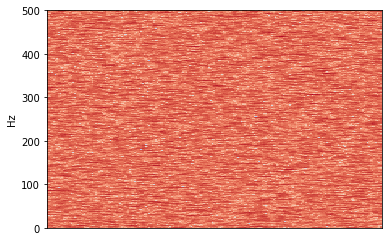

In [2]:
FS = 1000
wind = 2**11
step = 2**8
timebins = 55000
nsteps = math.floor((timebins-wind)/step+1)

time = [i*1/FS for i in range(timebins)]
omega = 50 # Hz
noise_amp = 0.1
sig_amp = 0
np.random.seed(10739)
sine = [sig_amp*math.sin(t*2*pi*omega) + 2*noise_amp*(np.random.rand()-0.5) for t in time]

# with open('randnoise.txt', 'w') as f:
#     for item in sine:
#         f.write("%s\n" % item)

rayleigh = FS/wind
nyquist = FS/2
freqs = [rayleigh*i for i in range(round(wind/2+1))]


# fts = [[0 for f in freqs] for s in range(nsteps)]
# psds = [[0 for f in freqs] for s in range(nsteps)]
# phfs = [[0 for f in freqs] for s in range(nsteps)]
fts = np.empty((len(freqs),nsteps),dtype=complex)
psds = np.empty((len(freqs),nsteps),dtype=float)
phfs = np.empty((len(freqs),nsteps),dtype=float)

sig = sine
for s in range(nsteps):
    seg = sig[step*s:step*s+wind]
    # seg = np.asarray(seg) * np.hanning(len(seg))
    ft = np.fft.fft(seg-np.mean(seg))
    fts[:,s] = ft[0:math.ceil(len(ft)/2)+1]
    psds[:,s] = abs(fts[:,s])**2
    phfs[:,s] = np.angle(fts[:,s])

# fts = np.ndarray.transpose(np.asarray(fts))
# psds = np.ndarray.transpose(np.asarray(psds))
# phfs = np.ndarray.transpose(np.asarray(phfs))
db = librosa.power_to_db(psds)
librosa.display.specshow(db, y_axis='linear',sr=FS) 
# librosa.display.specshow(db, y_axis='linear', sr=FS1, hop_length=step, x_axis="ms")

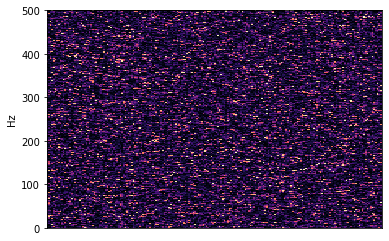

In [3]:
from phaseshift import phaseshift
phshift, psds, times, freqs = phaseshift(sine, windsize=wind, stepsize=step, sampfreq=FS)
# db = librosa.power_to_db(psds)
# librosa.display.specshow(db, y_axis='linear',sr=FS) 

librosa.display.specshow(phshift, y_axis='linear', sr=FS)

1025
1025
1025


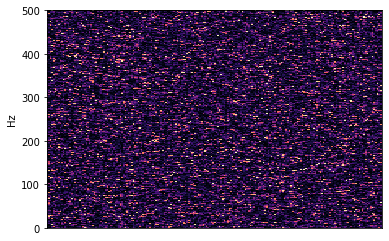

In [5]:
step_sec = step/FS
# phf = np.angle(fts); # uncorrected phases
# cphf = [[((pi + (phf[f][s]-2*pi*s*step_sec*freqs[f])) % 2*pi) - pi for s in range(len(fts[0]))] for f in range(len(fts))] # corrected phases

# cphf = [[((pi + (phfs[f,s]-2*pi*s*step_sec*freqs[f])) % 2*pi) - pi for s in range(len(fts[0]))] for f in range(len(fts))] # corrected phases
cphf = [[(pi + (phfs[f,s] - 2*pi*s*step/1000*freqs[f]) % (2*pi))-pi for s in range(nsteps)] for f in range(len(freqs))]


# something probably wrong calculating cphf???

phdiff = [np.diff(cphf[f]) for f in range(len(freqs))] # phase diff over time as func of freq
cphdiff = [[pi-abs(abs(phdiff[f][s])-pi) for s in range(nsteps-1)] for f in range(len(freqs))]  # wrap so 2pi is like 0, pi farthest
cphdiff_arr = np.asarray(cphdiff,dtype="float32")

librosa.display.specshow(cphdiff_arr, y_axis='linear', sr=FS)

(0.38, 0.58)

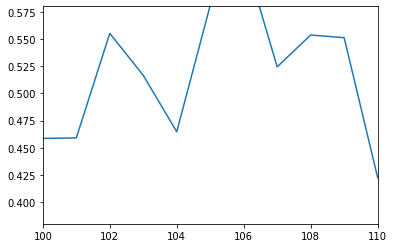

In [6]:
# mean_cphdiff = np.mean(cphdiff_arr, axis=1)
mean_cphdiff = np.mean(np.asarray(cphdiff), axis=1)
plt.plot(mean_cphdiff)
plt.xlim([100,110])
plt.ylim([0.38,0.58])

(0.0, 50.0)

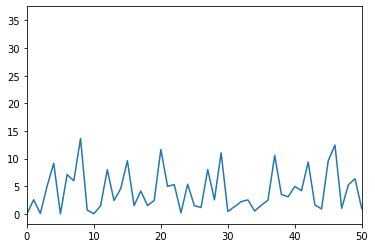

In [7]:
weird = np.fft.fft(mean_cphdiff-np.mean(mean_cphdiff))
plt.plot(abs(weird)**2)
plt.xlim([0, 50])

(203.0, 212.0)

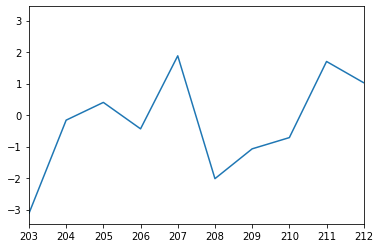

In [8]:
cphf_arr = np.asarray(cphf)
# plt.plot(cphf_arr[:,10])
plt.plot(phfs[:,10])
plt.xlim([203, 212])

207

In [61]:
test = np.array([[0+0j for f in freqs] for s in range(nsteps)])
test[0] = [2 for i in range(1025)]
test[:,0]

array([2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      

In [ ]:
# to-do: why list and array versions of #2 give different results??/